## Homework 4

Avinash Joshi

AMATH 422 Au 22

26 October 2022 

---

In [1]:
import numpy as np
import scipy as sp
from numpy import linalg
import matplotlib.pyplot as plt
import tqdm

from tqdm import tqdm as tqdm

---

## I

To begin the derivation of the sum of exponentials for the probability that the dwell time is exactly $k$ steps, I define $A = \left[\begin{array}{cccc}
    a_{11} & a_{12} & \ldots & a_{16}\\
    a_{21} & a_{22} & \ldots & a_{26}\\
    \vdots & \vdots &  \ddots & \vdots\\
    a_{61} & a_{62} & \ldots & a_{66}
\end{array}\right]$ where, while in state $s_j$, $a_{ij}$ is the probability to transition to state $s_i$. $A$ is formed in such a way that the probabilites associated with the open states, $s_1$ through $s_4$, are represented by the first 4 columns. From here, I define $p(0) = [p_1(0), p_2(0), \ldots, p_6(0)]$ which is the initialization propbability, e.g., if the system is intialized as being in the open state superstate, $O$, $p(0) = [p_1(0), p_2(0), p_3(0), p_4(0), 0, 0]$. Next, I define $p_i^O(k)$ which is the probability of being in state $i$ conditioned on the act that the system was in the open superstate, $O$, for time $0\leq l < k$. 

In general, $\left[\begin{array}{c}
    p^O_1(k+1) \\
    p^O_2(k+1) \\
    p^O_3(k+1) \\
    p^O_4(k+1)
\end{array}\right] = \left[\begin{array}{cccc}
    a_{11} & a_{12} & a_{13} & a_{14}\\
    a_{21} & a_{22} & a_{23} & a_{24}\\
    a_{31} & a_{32} & a_{33} & a_{34}\\
    a_{41} & a_{42} & a_{43} & a_{44}
\end{array}\right] \left[\begin{array}{c}
    p^O_1(k) \\
    p^O_2(k) \\
    p^O_3(k) \\
    p^O_4(k)
\end{array}\right]$, which is a system of four, linear, first-order difference equations. Thus, its solution is given by $\left[\begin{array}{c}
    p^O_1(k) \\
    p^O_2(k) \\
    p^O_3(k) \\
    p^O_4(k)
\end{array}\right] = c_1\lambda_1^kv_1 + c_2\lambda_2^kv_2 + c_3\lambda_3^kv_3 + c_4\lambda_4^kv_4$ where $c_i$ are constants determined by $p^O(0)$ and $v_i$ are the eigenvectors of the subset of matrix $A$ with each associated eigenvalue $\lambda_i$. Thus, the probability of the dwell time begin at least $k$ steps is the sum of each the probabilites $p_i^O(k)$, e.g., $p(\text{dwell time at least\ } m) = k_1\lambda_1^k + k_2\lambda_2^k + k_3\lambda_3^k + k_4\lambda_4^k$ where $k_i$ is a constant.

Since we are looking for the probability that the dwell time is exactly $m$ steps, denoted as  $p^{\text{dwell}}(m)$, we use the formula dervied for at least $m$ steps in conjunction with a sum to infinity to get $\sum_{m=k}^\infty p^{\text{dwell}}(m) = k_1\lambda_1^k + k_2\lambda_2^k + k_3\lambda_3^k + k_4\lambda_4^k$ and $\sum_{m=k+1}^\infty p^{\text{dwell}}(m) = k_1\lambda_1^{k+1} + k_2\lambda_2^{k+1} + k_3\lambda_3^{k+1} + k_4\lambda_4^{k+1}$. We know this is true because the probability of at least $m$ steps include all the probabilities of exactly $m, m+1, m+2,\ldots, \infty$ steps. Subtracting the first from the second then results in $p^{\text{dwell}}(k) = \alpha_1 \lambda_1^k + \alpha_2 \lambda_2^k + \alpha_3 \lambda_3^k + \alpha_4 \lambda_4^k$ where $\alpha_i$ is a constant and $\lambda_i$ is the eigenvalue for the reduced matrix.

---

## II

In [2]:
rng = np.random.default_rng(77)

A = np.array([[.98, .1, 0], 
              [.02, .7, .05], 
              [0, .2, .95]])
T = 5*10**5

states = np.zeros(T, dtype = int)
rstates = np.zeros(T, dtype = int)
states[0] = 0
rstates[0] = 0

for t in tqdm(range(T-1)):
    r = rng.uniform(0,1)
    if r < A[0,states[t]]:
        states[t+1] = 0
        rstates[t+1] = 0
    elif r >= A[0,states[t]]and r < 1 - A[2,states[t]]:
        states[t+1] = 1
        rstates[t+1] = 0
    elif r >= 1 - A[2,states[t]]:
        states[t+1] = 2
        rstates[t+1] = 2

100%|██████████| 499999/499999 [00:05<00:00, 99889.28it/s] 


In [3]:
dwell_time = np.zeros(15000)
bins = np.arange(0,250,1,dtype = int)
count = 0
idx = 0

for i in range(len(rstates)-1):
    if rstates[i+1] == 0:
            count += 1
    if rstates[i] == 0 and rstates[i+1] != 0:
        dwell_time[idx] = count
        count = 0
        idx += 1
            
dwell_time = dwell_time[:idx]
hist, bin_edges = np.histogram(dwell_time,bins = bins)

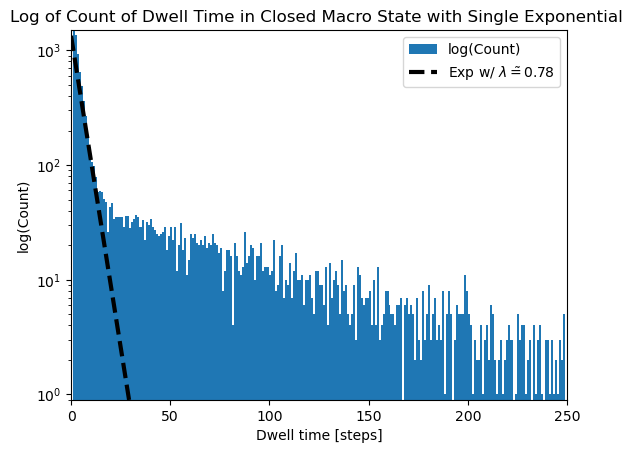

In [7]:
plt.hist(x = dwell_time, bins = bins, label ='log(Count)')
plt.yscale('log')
plt.ylabel('log(Count)')
plt.xlabel('Dwell time [steps]')
plt.xlim([0,250])
plt.ylim([0.9,1500])
plt.plot(np.arange(0,31,1),(np.exp(1)**7.2)*(np.exp(-0.25))**(np.arange(0,31,1)), 'k--', label = 'Exp w/ $\lambda \~= 0.78$', lw = 3)
plt.title('Log of Count of Dwell Time in Closed Macro State with Single Exponential ')
plt.legend()
plt.show()